# Data Mining 15.0621 Homework Assignment 2
## Questions 6.1, 7.3, 8.2, 9.3
## By: Jonathan Johannemann

In [8]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,warnings,random
from sklearn import *
random.seed(11152016) #Today's Date
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

## Question 6.1

In [9]:
bostonhousing = pd.read_csv('BostonHousing.csv',sep=',',header=0)
bostonhousing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


### Question 6.1 (a)

The data should be partitioned into training and validation sets because it allows the researcher to receive feedback on his or her model without testing on the true, held out data. The training set is for the model to be trained on. The validation set is for the researcher to test the ability of his or her model. A researcher should never introduce datapoints from the validation set into the training set.

### Question 6.1 (b)

In [12]:
model = sklearn.linear_model.LinearRegression()
model.fit(bostonhousing[['CRIM','CHAS','RM']],bostonhousing['MEDV'])
print "Intercept: ",model.intercept_
print "CRIM coefficient: ",model.coef_[0]
print "CHAS coefficient: ",model.coef_[1]
print "RM coefficient: ",model.coef_[2]
print "\nEquation: \n",model.intercept_, " + ",model.coef_[0],"CRIM + ",model.coef_[1],"CHAS + ",model.coef_[2],"RM = MEDV"

Intercept:  -28.8106825064
CRIM coefficient:  -0.260724411231
CHAS coefficient:  3.76303705211
RM coefficient:  8.27817981154

Equation: 
-28.8106825064  +  -0.260724411231 CRIM +  3.76303705211 CHAS +  8.27817981154 RM = MEDV


### Question 6.1 (c)

In [13]:
query = pd.DataFrame([['0.1','0','6']],columns=['CRIM','CHAS','RM'])
print "The predicted price is: ",model.predict(query)[0]

The predicted price is:  20.8323239217


In [14]:
tmp = bostonhousing[['CRIM','CHAS','RM']]
query_vals = query.values[0].astype('Float64')
index_closest = np.abs(tmp.apply(lambda x: x-query_vals,axis=1).sum(axis=1)).ix[np.abs(tmp.apply(lambda x: x-query_vals,axis=1).sum(axis=1))==np.abs(tmp.apply(lambda x: x-query_vals,axis=1).sum(axis=1)).min()].index[0]
print "The error with respect to the closest value is:", np.abs(bostonhousing.MEDV.ix[index_closest]-model.predict(query)[0])

The error with respect to the closest value is: 2.06767607827


### Question 6.1 (d) i.

In [15]:
corr_mat = bostonhousing[['INDUS','NOX','TAX']].corr()
print corr_mat

          INDUS       NOX       TAX
INDUS  1.000000  0.763651  0.720760
NOX    0.763651  1.000000  0.668023
TAX    0.720760  0.668023  1.000000


Indus is the proportion of nonretail business acres per town.
Nox is nitric oxide concentration.
Tax is full-value property-tax rate per $10,000.
The potential relationsnip here is that businesses create more nitric oxide and result in higher taxed property. Therefore, there is likely a causal relationship from INDUS to NOX and TAX. While it is not east ro 100% confirm this, it appears to be a likely scenario.

### Question 6.1 (d) ii.

In [16]:
corr_mat = bostonhousing.corr()
corr_mat.values[[np.arange(len(corr_mat))]*2]=0
corr_mat = corr_mat[np.abs(corr_mat)>0.6].fillna(0).reset_index()

for col in corr_mat.columns.values[1:]:
    if len(corr_mat[corr_mat[col]!=0][col].index)>0:
        print "="*40
        print "Looking at: ",col
        for i in corr_mat[corr_mat[col]!=0][col].index:
            print corr_mat['index'][i]," : ",corr_mat[corr_mat[col]!=0][col][i]
print "="*40

Looking at:  CRIM
RAD  :  0.625505145263
Looking at:  ZN
DIS  :  0.664408222762
Looking at:  INDUS
NOX  :  0.763651446921
AGE  :  0.644778511355
DIS  :  -0.708026988743
TAX  :  0.720760179952
LSTAT  :  0.603799716477
Looking at:  NOX
INDUS  :  0.763651446921
AGE  :  0.731470103786
DIS  :  -0.769230113226
RAD  :  0.611440563486
TAX  :  0.668023200403
Looking at:  RM
LSTAT  :  -0.613808271866
MEDV  :  0.695359947072
CAT.MEDV  :  0.641265408301
Looking at:  AGE
INDUS  :  0.644778511355
NOX  :  0.731470103786
DIS  :  -0.747880540869
LSTAT  :  0.602338528726
Looking at:  DIS
ZN  :  0.664408222762
INDUS  :  -0.708026988743
NOX  :  -0.769230113226
AGE  :  -0.747880540869
Looking at:  RAD
CRIM  :  0.625505145263
NOX  :  0.611440563486
TAX  :  0.910228188533
Looking at:  TAX
INDUS  :  0.720760179952
NOX  :  0.668023200403
RAD  :  0.910228188533
Looking at:  LSTAT
INDUS  :  0.603799716477
RM  :  -0.613808271866
AGE  :  0.602338528726
MEDV  :  -0.737662726174
Looking at:  MEDV
RM  :  0.6953599470

CAT.MEDV is based off of MEDV so we need to remove that. As discussed before, it seems like INDUS may be influencing NOX and TAX a lot which causes the high correlation. Therefore, we shall remove NOX and TAX.

### Question 6.1 (d) iii.

## NOTE STILL NEED TO REMOVE SOME VARIABLES OR ADJUST FOR MULTICOLLINEARITY!

## ALSO LOOK INTO SKLEARN.FEATURE_SELECTION.RFE it's like backward selection

In [159]:
from itertools import combinations
pre = []
print list(combinations(bostonhousing.columns.values,8))

[('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'LSTAT'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'MEDV'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'CAT.MEDV'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'LSTAT'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'MEDV'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'CAT.MEDV'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO'), ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'LSTAT'), ('CRIM', 

In [158]:
columns = list(set(bostonhousing.columns.values)-set(['MEDV',]))
X,Xt,y,yt = sklearn.cross_validation.train_test_split(bostonhousing[columns],bostonhousing.MEDV,test_size=0.2)

estimator = sklearn.svm.SVR(kernel='linear')

rfe = sklearn.feature_selection.RFE(estimator,1,1)
rfe = rfe.fit(X,y)
print rfe.ranking_


scaler = sklearn.preprocessing.StandardScaler()
columns = list(set(bostonhousing.columns.values)-set(['MEDV','CAT.MEDV','NOX','TAX']))
for col in columns:
    bostonhousing[col] = scaler.fit_transform(bostonhousing[col])

model = sklearn.linear_model.Lasso().fit(bostonhousing[columns],bostonhousing.MEDV)
print model.coef_
model = sklearn.linear_model.Ridge().fit(bostonhousing[columns],bostonhousing.MEDV)
print model.coef_
#model = sklearn.pipeline.Pipeline([('norm',sklearn.preprocessing.StandardScaler()),('feature_selection',sklearn.feature_selection.RFE()),('lr',sklearn.linear_model.LinearRegression(n_jobs=-1))])
#parameters = {'feature_selection__k':range(1,len(bostonhousing.columns.values)-1)}
#grid_search = sklearn.grid_search.GridSearchCV(model,parameters,cv=5,n_jobs=4,scoring='mean_squared_error')
#grid_search.fit(X,y)
#grid_search.grid_scores_

[ 9 13  2 10  7  8  1 11  5  3 12  4  6]
[-0.          0.         -3.62396823 -0.         -0.          0.00536367
  2.68207401 -0.         -1.35589213 -0.        ]
[-0.95600217  0.87904702 -4.06155843 -0.4421693   0.34556464  0.78788987
  2.78167572 -1.18586585 -1.61616177 -2.53213834]


So the problem says to choose the top three models but it does not say what it's based on. So from what I can see, it looks like there should be a 20% cross validation set and then an 80% training set. I am assuming that the best model should be determined in terms of accuracy on the training set data.

Note: The reason that values are negative is because this was purposefully done so that the output can be used for maximization given some hyperparamters.

## Note
at point72, Kai showed you lasso and how you could show the incremental change in accuracy as you added more features...

## Question 7.3

### Question 7.3 (a)

In [146]:
bostonhousing = pd.read_csv('BostonHousing.csv',sep=',',header=0)
bostonhousing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [147]:
scaler = sklearn.preprocessing.StandardScaler()
columns = list(set(bostonhousing.columns.values)-set(['MEDV','CAT.MEDV']))
for col in columns:
    bostonhousing[col] = scaler.fit_transform(bostonhousing[col])

print bostonhousing.head()

X,Xt,y,yt = sklearn.cross_validation.train_test_split(bostonhousing[columns],bostonhousing.MEDV,test_size=0.4)

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO     LSTAT  MEDV  CAT.MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000 -1.075562  24.0         0  
1  0.557160 -0.867883 -0.987329 -0.303094 -0.492439  21.6         0  
2  0.557160 -0.867883 -0.987329 -0.303094 -1.208727  34.7         1  
3  1.077737 -0.752922 -1.106115  0.113032 -1.361517  33.4         1  
4  1.077737 -0.752922 -1.106115  0.113032 -1.026501  36.2         1  


In [148]:
for i in range(1,6):
    knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X,y)
    print "For k = ",i,", R^2 value is:",knn_model.score(Xt,yt)

For k =  1 , R^2 value is: 0.716571804077
For k =  2 , R^2 value is: 0.750704983174
For k =  3 , R^2 value is: 0.771524349417
For k =  4 , R^2 value is: 0.763921437598
For k =  5 , R^2 value is: 0.74303223538


Using 12 variables, it looks like k = 2 has the best performance with respect to R^2 value. This means that the prediction is based on the bucket/leaf that is indicated from the closest 2 observations.

###  Question 7.3 (b)

In [150]:
query = pd.DataFrame([[0.2,0,7,0,0.538,6,62,4.7,4,307,21,10]],columns=list(bostonhousing.columns.values[:12]))
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X,y)
print "For k =",2,", predicted value is:",knn_model.predict(query)

For k = 2 , predicted value is: [ 16.85]


### Question 7.3 (c)

### Question 7.3 (d)

In [25]:
bostonhousing = pd.read_csv('BostonHousing.csv',sep=',',header=0)
scaler = sklearn.preprocessing.StandardScaler()
continuous_columns = list(set(bostonhousing.columns.values)-set(['CHAS','MEDV','CAT.MEDV',]))
for col in continuous_columns:
    bostonhousing[col] = scaler.fit_transform(bostonhousing[col])

print bostonhousing.head(),"\n"

X,Xt,y,yt = sklearn.cross_validation.train_test_split(bostonhousing[columns],bostonhousing.MEDV,test_size=0.4)

for i in range(1,6):
    knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=i)
    knn_model = knn_model.fit(X,y)
    print "For k = ",i,", R^2 value is:",knn_model.score(Xt,yt)
    
print "\nFor k =",2,", predicted value is:",knn_model.predict(query)

       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.419782  0.284830 -1.287909     0 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381     0 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381     0 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878     0 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878     0 -0.835284  1.228577 -0.511180  1.077737   

        RAD       TAX   PTRATIO     LSTAT  MEDV  CAT.MEDV  
0 -0.982843 -0.666608 -1.459000 -1.075562  24.0         0  
1 -0.867883 -0.987329 -0.303094 -0.492439  21.6         0  
2 -0.867883 -0.987329 -0.303094 -1.208727  34.7         1  
3 -0.752922 -1.106115  0.113032 -1.361517  33.4         1  
4 -0.752922 -1.106115  0.113032 -1.026501  36.2         1   

For k =  1 , R^2 value is: 0.685683797456
For k =  2 , R^2 value is: 0.679607961431
For k =  3 , R^2 value is: 0.701437820157
For k =  4 , R^2 value is

# Are there any non-continuous/discrete data that is not the Charles River variable?

###  Question 7.3 (e)
The disadvantage of using the k-NN prediction is that 

## Question 8.2

### Question 8.2 (a)

In [63]:
accidents = pd.read_csv('Accidents.csv',sep=',',header=0)
accidents['INJURY'] = accidents.MAX_SEV_IR.apply(lambda x: x>0)
accidents.head()

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR,INJURY
0,0,2,2,1,0,1,0,3,0,0,...,0,3,1,1,1,1,0,0,1,True
1,1,2,1,0,0,1,1,3,2,0,...,0,3,2,2,0,0,1,0,0,False
2,1,2,1,0,0,1,0,3,2,0,...,1,2,2,2,0,0,1,0,0,False
3,1,2,1,1,0,0,0,3,2,0,...,1,2,2,1,0,0,1,0,0,False
4,1,1,1,0,0,1,0,3,2,0,...,0,2,3,1,0,0,1,0,0,False


In [65]:
print "Probability of injury given crash: ",len(accidents[accidents.INJURY==True])/float(len(accidents))

 Probability of injury given crash:  0.508783159093


Given that the probability is over 50%, without further knowledge we assume that there is an injury.

### Question 8.2 (b) i.    NEEDS TO BE LOOKED AT AGAIN

In [66]:
q82bi = accidents[['WEATHER_R','TRAF_CON_R','INJURY']].head(12)
q82bi.describe()

,WEATHER_R,TRAF_CON_R
count,12.000000,12.000000
mean,1.583333,0.333333
std,0.514929,0.651339
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,0.250000
max,2.000000,2.000000


Taking a preliminary look.

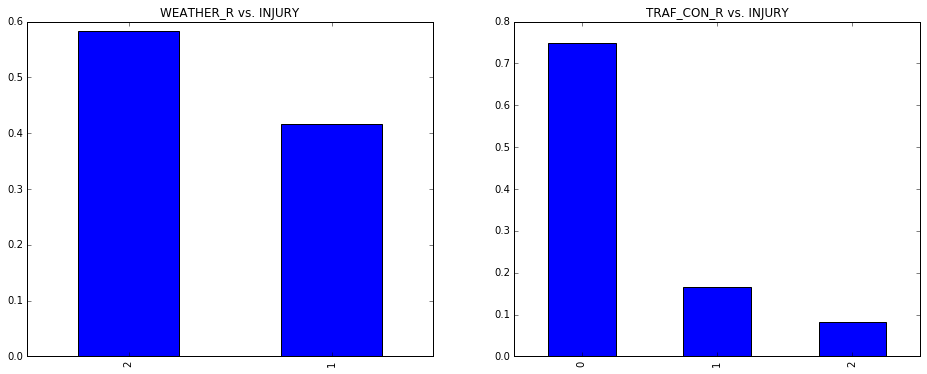

In [67]:
fig, axs = plt.subplots(1,2)
q82bi.WEATHER_R.value_counts('INJURY').plot(kind='bar',title='WEATHER_R vs. INJURY',ax=axs[0],figsize=(16,6))
q82bi.TRAF_CON_R.value_counts('INJURY').plot(kind='bar',title='TRAF_CON_R vs. INJURY',ax=axs[1],figsize=(16,6))

### Question 8.2 (b) ii.

In [178]:
injuries = accidents[accidents.INJURY==True]
prob_df = np.zeros((12,3))
count = 0
for val1 in sorted(pd.unique(injuries['WEATHER_R'])):
    weather_adjusted = injuries[injuries.WEATHER_R==val1]
    weather_adjusted2 = accidents[accidents.WEATHER_R==val1]
    for val2 in sorted(pd.unique(injuries['TRAF_CON_R'])):
        traf_adjusted = weather_adjusted[weather_adjusted.TRAF_CON_R==val2]
        traf_adjusted2 = weather_adjusted2[weather_adjusted2.TRAF_CON_R==val2]
        print "For WEATHER_R: %s and TRAF_CON_R: %s," % (val1,val2)," we get: ",len(traf_adjusted)/float(len(traf_adjusted2)) 
        prob_df[count][2] = (len(traf_adjusted)/float(len(traf_adjusted2)))
        prob_df[count][1] = val2
        prob_df[count][0] = val1
        count+=1
prob_df = pd.DataFrame(prob_df,columns=['WEATHER_R','TRAF_CON_R','INJURY_PROB'])

For WEATHER_R: 1 and TRAF_CON_R: 0,  we get:  0.503111033214
For WEATHER_R: 1 and TRAF_CON_R: 1,  we get:  0.553423927525
For WEATHER_R: 1 and TRAF_CON_R: 2,  we get:  0.531550068587
For WEATHER_R: 2 and TRAF_CON_R: 0,  we get:  0.443616253907
For WEATHER_R: 2 and TRAF_CON_R: 1,  we get:  0.500894454383
For WEATHER_R: 2 and TRAF_CON_R: 2,  we get:  0.430294906166


Do we make these predictions based on the bayesian values on the entire table or just the 12?

### Question 8.2 (b) iii.

In [179]:
new_df = pd.merge(q82bi,prob_df,on=['WEATHER_R','TRAF_CON_R'],how='left')
print new_df.head()

   WEATHER_R  TRAF_CON_R INJURY  INJURY_PROB
0          1           0   True     0.503111
1          2           0  False     0.443616
2          2           1  False     0.500894
3          1           1  False     0.553424
4          1           0  False     0.503111


In [186]:
new_df['Prediction'] = new_df.INJURY_PROB.apply(lambda x: x>0.50)
print new_df[['INJURY','Prediction']],"\n"
conf_mat = sklearn.metrics.confusion_matrix(new_df.INJURY,new_df.Prediction)
print "Confusion Matrix: \n",conf_mat
print "Accuracy: ",(conf_mat[0][0]+conf_mat[1][1])/float(12)
print "F1 Score: ", (2*conf_mat[0][0])/float(2*conf_mat[0][0]+conf_mat[1][0]+conf_mat[0][1])

   INJURY Prediction
0    True       True
1   False      False
2   False       True
3   False       True
4   False       True
5    True      False
6   False      False
7    True       True
8   False      False
9   False      False
10  False      False
11  False       True 

Confusion Matrix: 
[[5 4]
 [1 2]]
Accuracy:  0.583333333333
F1 Score:  0.666666666667


## WHAT ARE VALUE LABELS?

### Question 8.2 (b) iv.

In [189]:
weather_probability = len(injuries[injuries.WEATHER_R==1])/float(len(injuries))
traf_con_probability = len(injuries[injuries.TRAF_CON_R==1])/float(len(injuries))
print "WEATHER_R = 1 injury probability: ",weather_probability
print "TRAF_CON_R = 1 injury probability: ",traf_con_probability
print "Multiply these two to get the naive Bayes conditional probability for given both:", weather_probability*traf_con_probability

WEATHER_R = 1 injury probability:  0.872984810363
TRAF_CON_R = 1 injury probability:  0.219644021992
Multiply these two to get the naive Bayes conditional probability for given both: 0.191745894886


# DOUBLE CHECK TO MAKE SURE THIS IS BEING DONE RIGHT

### Question 8.2 (b) v.

In [192]:
gnb = sklearn.naive_bayes.GaussianNB()
gnb.fit(accidents[['WEATHER_R','TRAF_CON_R']],accidents['INJURY'])
print "The mean accuracy value is: ",gnb.score(injuries[['WEATHER_R','TRAF_CON_R']],injuries['INJURY'])

The mean accuracy value is:  0.872984810363


### Question 8.2 (c) i.

In [193]:
#is this a reiteration of the first question?

### Question 8.2 (c) ii.

### Question 8.2 (c) iii.

### Question 8.2 (c) iv.

### Question 8.2 (c) v.

### Question 8.2 (c) vi.

## Question 9.3

### Question 9.3 (a) i.

In [80]:
toyota = pd.read_csv('ToyotaCorolla.csv',sep=',',header=0)
toyota.head()

,﻿Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Validation
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,Validation
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,Validation
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,Training
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,Training
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,Validation


In [87]:
predictors = ['Age_08_04','KM','Fuel_Type','HP','Automatic','Doors','Quarterly_Tax','Mfg_Guarantee',
              'Guarantee_Period','Airco','Automatic_airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar']
predicted = ['Price']
train_X,cv_X,train_Y,cv_Y = sklearn.cross_validation.train_test_split(toyota[predictors],toyota[predicted],test_size=0.5)
cv_X,test_X,cv_Y,test_Y = sklearn.cross_validation.train_test_split(cv_X,cv_Y,test_size=0.4)
print "Train: ",len(train_Y),"CV: ",len(cv_Y),"Test: ",len(test_Y)

Train:  718 CV:  430 Test:  288


In [81]:
for col in toyota.columns.values: print col

﻿Id
Model
Price
Age_08_04
Mfg_Month
Mfg_Year
KM
Fuel_Type
HP
Met_Color
Color
Automatic
CC
Doors
Cylinders
Gears
Quarterly_Tax
Weight
Mfg_Guarantee
BOVAG_Guarantee
Guarantee_Period
ABS
Airbag_1
Airbag_2
Airco
Automatic_airco
Boardcomputer
CD_Player
Central_Lock
Powered_Windows
Power_Steering
Radio
Mistlamps
Sport_Model
Backseat_Divider
Metallic_Rim
Radio_cassette
Tow_Bar
Validation


In [82]:
toyota.dtypes

﻿Id                  int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
CC                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfg_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [162]:
toyota.Fuel_Type = sklearn.preprocessing.LabelEncoder().fit_transform(toyota.Fuel_Type)

model = sklearn.tree.DecisionTreeRegressor() #the minimum number of samples for a leaf is 
#automatically set to 1 here
model = model.fit(train_X,train_Y)

Answer: Intuitively, as we make more splits, you are going to see an improvement in the training, validaiton, and test sets. However, over time, since the splits are being done with respect to the training data, we will notice improvements in RSquare and RMSE initially for all 3. But, as the tree starts to overfit the training data, we notice that the improvements reverse and start to hurt the accuracy of the model given that the model is not being trained on the held out examples in the cross validation or test set.

## it says split 1, double check to make sure you did that right.

### Question 9.3 (a) ii.

In [167]:
print "\nTraining R^2: ",model.score(train_X,train_Y)
pred_train = model.predict(train_X)
print "Training RMSE: ",np.sqrt(sklearn.metrics.mean_squared_error(train_Y,pred_train))

print "Cross Validation R^2: ",model.score(cv_X,cv_Y)
pred_cv = model.predict(cv_X)
print "Cross Validation RMSE: ",np.sqrt(sklearn.metrics.mean_squared_error(cv_Y,pred_cv))

print "Test R^2: ",model.score(test_X,test_Y)
pred_test = model.predict(test_X)
print "Test RMSE: ",np.sqrt(sklearn.metrics.mean_squared_error(test_Y,pred_test))



Training R^2:  1.0
Training RMSE:  0.0
Cross Validation R^2:  0.83000114637
Cross Validation RMSE:  1472.1687269
Test R^2:  0.811726566633
Test RMSE:  1536.25375305


The tree gets to the point where there is one value in each bucket. So it makes sense that the RMSE and R^2 is perfect because the tree is overfit at this point. So the test set performance is wildly different. The validation set is a lot closer to the test set because the model has not seen the validation set either and the tree has not been pruned using the validation set. So, the error is very similar to the test R^2 and RMSE.

### Question 9.3 (a) iii.

In [111]:
for i in range(len(predictors)):
    print sorted(zip(predictors,model.feature_importances_),
                 key = lambda t: t[1],reverse=True)[i]

('Age_08_04', 0.83701456101571803)
('KM', 0.056385106740197519)
('HP', 0.044914445971050612)
('Quarterly_Tax', 0.020782531935002384)
('Automatic_airco', 0.0076851801096969128)
('Doors', 0.0072136204728791512)
('Airco', 0.0064297558168447374)
('Powered_Windows', 0.0048661075394338385)
('Tow_Bar', 0.0036172757982181158)
('Mfg_Guarantee', 0.0029381752617290463)
('CD_Player', 0.0023236480480727227)
('Automatic', 0.0019107128325424345)
('Sport_Model', 0.0015581695388026478)
('Guarantee_Period', 0.001491803534171069)
('Fuel_Type', 0.00086890538564100329)


### Question 9.3 (a) iv.

In [131]:
params ={'model__max_depth' : range(2,20),
         'model__min_samples_leaf': range(2,10),
        'model__min_impurity_split' : [1e-7,1e-6,1e-5,1e-4,1e-3]}
tree2 = sklearn.tree.DecisionTreeRegressor()
pipe = sklearn.pipeline.Pipeline([('model',tree2)])#,('cv',sklearn.model_selection.cross_val_score())])
search = sklearn.grid_search.GridSearchCV(pipe,params)
search.fit(train_X,train_Y)
print search.score(train_X,train_Y)
print search.score(cv_X,cv_Y)
print search.score(test_X,test_Y)

0.94816522708
0.848708575649
0.866119127706


# call in rpy2 and prune trees in R to show output

So a potential alternative is to run a gridsearch that seeks to maximize the cross validation score based on varying max_depth or max_leaf_node or min split size. Then, have that model returned. Since sklearn does not support pruning. 

Pruning is a technique in machine learning that reduces the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

So something that we could also look at is the min_impurity variable which is something we could set. If the impurity is bad, then we know that the predictive ability is bad and instead of doing this in top-down AND then bottom-up sequence, we could simply does this on the way as we go top-down in decision tree creation.

### Question 9.3 (a) v.

### Question 9.3 (a) vi.

### Question 9.3 (a) vii.